In [33]:
# Import the libraries needed
import os
from pathlib import Path
from bs4 import BeautifulSoup
from collections import Counter
import itertools
import matplotlib as plt
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import random
import spacy
from spacy import displacy
from spacy.lang.en import English
from urllib.request import urlopen
import re
import requests
import seaborn as sns

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')

## Importing Dataset

In [4]:
reviews = pd.read_json('data/reviewSelected100.json', encoding='ISO-8859-1', lines=True)

## 3.2 Dataset Analysis

### Tokenisation and Stemming

In [5]:
# get reviews for a random business 
random_business = reviews.sample(random_state=16)
random_business_id = random_business.iloc[0]['business_id']
small_business_dataset = reviews.loc[reviews['business_id'] == random_business_id]
small_business_dataset.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3128,XoIFztsh5dpHB_t_egFfdQ,F3kQlBYlD__s-J9U2-HsEA,xVpE01l6ZXdEtVf5PkRpDg,1,1,1,0,"Crap. $18 for fried chicken thighs, ham hock &...",2016-08-04 02:18:55
3132,TDMUFrflTe3bsCH_JZntUQ,A1x6u0aDh0dAUbUY4Qi9hQ,xVpE01l6ZXdEtVf5PkRpDg,5,2,0,3,I've been here almost 2 years from Los Angeles...,2015-12-21 03:12:30
3178,8biDmCi4A4CUZAHL61y3BQ,ZGS8ribIELU9IVNOvkgykg,xVpE01l6ZXdEtVf5PkRpDg,5,1,0,0,Wow! Exquisite service and fantastic food! Ch...,2015-11-07 02:09:15
3201,_XNO2o0x3XU75jjTW7mqGQ,ZGS8ribIELU9IVNOvkgykg,xVpE01l6ZXdEtVf5PkRpDg,5,0,0,0,Now I have happily experienced Julep six times...,2016-07-05 13:37:40
3250,fCbJec523CMaRElfKen12w,QqIDHcG_1MHfKKbt5zlQHA,xVpE01l6ZXdEtVf5PkRpDg,4,11,3,4,Julep is a new fusion/southern spot on E Washi...,2015-11-20 07:42:26


In [6]:
# convert the reviews into a concatenated string 
small_business_dataset_reviews = list(small_business_dataset['text'])
b1_review = ''.join(small_business_dataset_reviews)
clean_review = re.sub(r"[^A-Za-z0-9\s]+", "", b1_review)
b1_review = nlp(clean_review)

# removed punctuation and get the top 10 most common words (including stopwords)
b1_review_words = [token.text for token in b1_review if token.is_alpha == True] 
b1_word_freq = Counter(b1_review_words)
b1_common_words = b1_word_freq.most_common(10)
print(b1_common_words)

[('the', 625), ('and', 559), ('a', 362), ('was', 334), ('I', 263), ('to', 255), ('of', 233), ('The', 229), ('with', 167), ('is', 167)]


In [7]:
# removed punctuation and get the top 10 most common words (excluding stopwords)
b1_review_words = [token.text for token in b1_review if token.is_stop != True and token.is_alpha == True] 
b1_word_freq = Counter(b1_review_words)
b1_common_words_nsw = b1_word_freq.most_common(10)
print(b1_common_words_nsw)

[('food', 87), ('nt', 86), ('good', 78), ('Julep', 64), ('chicken', 55), ('grits', 52), ('great', 50), ('place', 48), ('shrimp', 45), ('like', 42)]


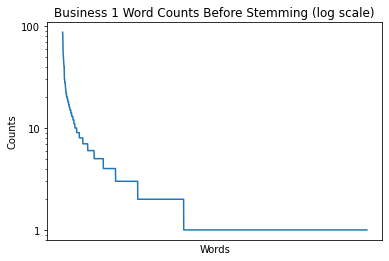

In [8]:
# log graph before stemming
df = pd.DataFrame(b1_word_freq.items(), columns=['word', 'count'])
df = df.sort_values(by=['count'], ascending=False)

ticks = [1, 10, 100]
figure = sns.lineplot(data=df, x='word', y='count')
figure.set_yscale("log") 
figure.set_yticks(ticks)
figure.set_yticklabels(ticks)
figure.set_xticks([])
figure.set_xticklabels([])
figure.set_xlabel('Words')
figure.set_ylabel('Counts')
figure.set_title("Business 1 Word Counts Before Stemming (log scale)")

fig = figure.get_figure()
fig.savefig("figures/b1_freq_before_stemming") 

In [9]:
# now we do some stemming after removing the stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

porter_st = PorterStemmer()
lancaster_st = LancasterStemmer()
snow_st = SnowballStemmer("english")

In [10]:
# Using Porter Stemmer
porter_stemmed_words = [porter_st.stem(word) for word in b1_review_words]
porter_freq = Counter(porter_stemmed_words)
b1_porter_common_nsw = porter_freq.most_common(10)
print(b1_porter_common_nsw)

[('food', 88), ('julep', 87), ('nt', 86), ('good', 80), ('great', 60), ('chicken', 59), ('order', 57), ('grit', 56), ('place', 53), ('shrimp', 52)]


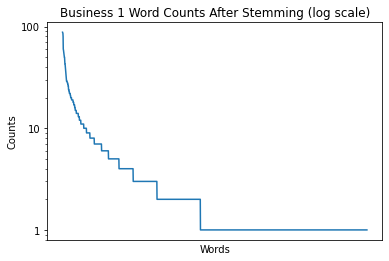

In [11]:
# log graph after stemming (porter stemmer)
df = pd.DataFrame(porter_freq.items(), columns=['word', 'count'])
df = df.sort_values(by=['count'], ascending=False)

ticks = [1, 10, 100]
figure = sns.lineplot(data=df, x='word', y='count')
figure.set_yscale("log") 
figure.set_yticks(ticks)
figure.set_yticklabels(ticks)
figure.set_xticks([])
figure.set_xticklabels([])
figure.set_xlabel('Words')
figure.set_ylabel('Counts')
figure.set_title("Business 1 Word Counts After Stemming (log scale)")

fig = figure.get_figure()
fig.savefig("figures/b1_freq_after_stemming")

In [12]:
# Using Lancaster Stemmer
lancaster_stemmed_words = [lancaster_st.stem(word) for word in b1_review_words]
lancaster_freq = Counter(lancaster_stemmed_words)
lancaster_common = lancaster_freq.most_common(10)
print(lancaster_common)

[('food', 89), ('julep', 88), ('nt', 86), ('good', 81), ('serv', 62), ('gre', 61), ('chick', 60), ('ord', 57), ('grit', 56), ('plac', 53)]


In [13]:
# Using Snowball Stemmer
snow_stemmed_words = [snow_st.stem(word) for word in b1_review_words]
snow_freq = Counter(snow_stemmed_words)
snow_common = snow_freq.most_common(10)
print(snow_common)

[('food', 88), ('julep', 87), ('nt', 86), ('good', 80), ('great', 60), ('chicken', 59), ('order', 57), ('grit', 56), ('place', 53), ('shrimp', 52)]


---
Doing the same process for business 2

In [14]:
# get reviews for a random business 
random_business = reviews.sample(random_state=93)
random_business_id = random_business.iloc[0]['business_id']
small_business_dataset = reviews.loc[reviews['business_id'] == random_business_id]

# convert the reviews into a concatenated string 
small_business_dataset_reviews = list(small_business_dataset['text'])
b2_review = ''.join(small_business_dataset_reviews)
clean_review = re.sub(r"[^A-Za-z0-9\s]+", "", b2_review)
b2_review = nlp(clean_review)

# removed punctuation and get the top 10 most common words (including stopwords)
b2_review_words = [token.text for token in b2_review if token.is_alpha == True] 
b2_word_freq = Counter(b2_review_words)
b2_common_words = b2_word_freq.most_common(10)
print(b2_common_words)

[('the', 742), ('and', 500), ('to', 434), ('I', 387), ('a', 365), ('was', 287), ('in', 186), ('is', 178), ('of', 177), ('for', 156)]


In [15]:
# removed punctuation and get the top 10 most common words (excluding stopwords)
b2_review_words = [token.text for token in b2_review if token.is_stop != True and token.is_alpha == True] 
b2_word_freq = Counter(b2_review_words)
b2_common_words_nsw = b2_word_freq.most_common(10)
print(b2_common_words_nsw)

[('hotel', 125), ('room', 115), ('nt', 108), ('airport', 74), ('stay', 73), ('staff', 60), ('shuttle', 56), ('breakfast', 54), ('night', 54), ('Hampton', 52)]


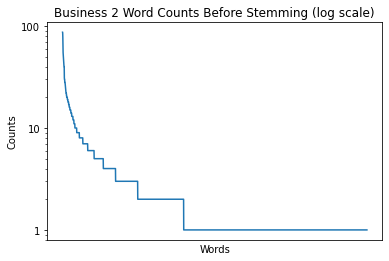

In [16]:
# log graph before stemming
df = pd.DataFrame(b1_word_freq.items(), columns=['word', 'count'])
df = df.sort_values(by=['count'], ascending=False)

ticks = [1, 10, 100]
figure = sns.lineplot(data=df, x='word', y='count')
figure.set_yscale("log") 
figure.set_yticks(ticks)
figure.set_yticklabels(ticks)
figure.set_xticks([])
figure.set_xticklabels([])
figure.set_xlabel('Words')
figure.set_ylabel('Counts')
figure.set_title("Business 2 Word Counts Before Stemming (log scale)")

fig = figure.get_figure()
fig.savefig("figures/b2_freq_before_stemming") 

In [17]:
# Using Porter Stemmer
porter_stemmed_words = [porter_st.stem(word) for word in b2_review_words]
porter_freq = Counter(porter_stemmed_words)
b2_porter_common_nsw = porter_freq.most_common(10)
print(b2_porter_common_nsw)

[('room', 150), ('hotel', 149), ('stay', 113), ('nt', 108), ('airport', 78), ('staff', 67), ('breakfast', 61), ('shuttl', 61), ('night', 60), ('clean', 59)]


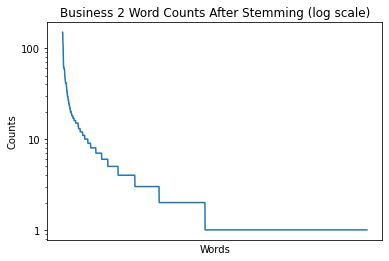

In [18]:
# log graph after stemming (porter stemmer)
df = pd.DataFrame(porter_freq.items(), columns=['word', 'count'])
df = df.sort_values(by=['count'], ascending=False)

ticks = [1, 10, 100]
figure = sns.lineplot(data=df, x='word', y='count')
figure.set_yscale("log") 
figure.set_yticks(ticks)
figure.set_yticklabels(ticks)
figure.set_xticks([])
figure.set_xticklabels([])
figure.set_xlabel('Words')
figure.set_ylabel('Counts')
figure.set_title("Business 2 Word Counts After Stemming (log scale)")

fig = figure.get_figure()
fig.savefig("figures/b2_freq_after_stemming") 

In [19]:
# Using Lancaster Stemmer
lancaster_stemmed_words = [lancaster_st.stem(word) for word in b2_review_words]
lancaster_freq = Counter(lancaster_stemmed_words)
lancaster_common = lancaster_freq.most_common(10)
print(lancaster_common)

[('room', 151), ('hotel', 150), ('stay', 114), ('nt', 108), ('airport', 78), ('staff', 67), ('cle', 65), ('night', 61), ('breakfast', 61), ('shuttl', 61)]


In [20]:
# Using Snowball Stemmer
snow_stemmed_words = [snow_st.stem(word) for word in b2_review_words]
snow_freq = Counter(snow_stemmed_words)
snow_common = snow_freq.most_common(10)
print(snow_common)

[('room', 150), ('hotel', 149), ('stay', 113), ('nt', 108), ('airport', 78), ('staff', 67), ('night', 61), ('breakfast', 61), ('shuttl', 61), ('clean', 59)]


In [21]:
common_words_df = pd.DataFrame(
    [
        b1_common_words_nsw,
        b1_porter_common_nsw,
        b2_common_words_nsw,
        b2_porter_common_nsw
    ]
)
common_words_df = common_words_df.transpose()
common_words_df.columns = ['b1_common', 
                           'b1_common_stemmed', 
                           'b2_common', 
                           'b2_common_stemmed']
common_words_df.to_csv("common_words.csv")
common_words_df

,b1_common,b1_common_stemmed,b2_common,b2_common_stemmed
0,"(food, 87)","(food, 88)","(hotel, 125)","(room, 150)"
1,"(nt, 86)","(julep, 87)","(room, 115)","(hotel, 149)"
2,"(good, 78)","(nt, 86)","(nt, 108)","(stay, 113)"
3,"(Julep, 64)","(good, 80)","(airport, 74)","(nt, 108)"
4,"(chicken, 55)","(great, 60)","(stay, 73)","(airport, 78)"
5,"(grits, 52)","(chicken, 59)","(staff, 60)","(staff, 67)"
6,"(great, 50)","(order, 57)","(shuttle, 56)","(breakfast, 61)"
7,"(place, 48)","(grit, 56)","(breakfast, 54)","(shuttl, 61)"
8,"(shrimp, 45)","(place, 53)","(night, 54)","(night, 60)"
9,"(like, 42)","(shrimp, 52)","(Hampton, 52)","(clean, 59)"


### POS Tagging

In [22]:
random_sentences = list(reviews['text'])

In [23]:
sentence_tokenized = [sent_tokenize(string) for string in random_sentences]
sentence_tokenized = [string for sublist in sentence_tokenized for string in sublist]

In [24]:
chosen_sentences = random.sample(sentence_tokenized, 5)
chosen_sentences

['I hear their Mac and cheese is good but have not tried it myself.',
 'however the food was good.',
 'MSG is a HUGE TURNOFF for me in foods!',
 'They give you this huge takeout box, which lends to the disappointment when you open it to discover a half-anemic tamale.',
 'It would be a great place to watch the games on the weekends if they add a few TVs.']

In [25]:
spacy_tagged = []
for sentence in chosen_sentences:
    spacy_tagged.append(nlp(sentence))
for tagged in spacy_tagged:
    for token in tagged:
        print(f'{token.text:{8}} {token.pos_:{6}}')

I        PRON  
hear     VERB  
their    DET   
Mac      PROPN 
and      CCONJ 
cheese   NOUN  
is       AUX   
good     ADJ   
but      CCONJ 
have     AUX   
not      PART  
tried    VERB  
it       PRON  
myself   PRON  
.        PUNCT 
however  ADV   
the      DET   
food     NOUN  
was      AUX   
good     ADJ   
.        PUNCT 
MSG      PROPN 
is       AUX   
a        DET   
HUGE     PROPN 
TURNOFF  PROPN 
for      ADP   
me       PRON  
in       ADP   
foods    NOUN  
!        PUNCT 
They     PRON  
give     VERB  
you      PRON  
this     DET   
huge     ADJ   
takeout  NOUN  
box      NOUN  
,        PUNCT 
which    DET   
lends    VERB  
to       ADP   
the      DET   
disappointment NOUN  
when     ADV   
you      PRON  
open     VERB  
it       PRON  
to       PART  
discover VERB  
a        DET   
half     ADJ   
-        PUNCT 
anemic   ADJ   
tamale   NOUN  
.        PUNCT 
It       PRON  
would    VERB  
be       AUX   
a        DET   
great    ADJ   
place    NOUN  
to

In [36]:
from spacy import displacy
svg = displacy.render(spacy_tagged[0], style="dep", jupyter=False)

output_path = Path("figures/dependency_plot_0.svg")
output_path.open("w", encoding="utf-8").write(svg)

11382

In [37]:
svg = displacy.render(spacy_tagged[1], style="dep", jupyter=False)
output_path = Path("figures/dependency_plot_1.svg")
output_path.open("w", encoding="utf-8").write(svg)

3849

In [42]:
svg = displacy.render(spacy_tagged[2], style="dep", jupyter=False)
output_path = Path("figures/dependency_plot_2.svg")
output_path.open("w", encoding="utf-8").write(svg)

7189

In [40]:
svg = displacy.render(spacy_tagged[3], style="dep", jupyter=False)
output_path = Path("figures/dependency_plot_3.svg")
output_path.open("w", encoding="utf-8").write(svg)

18093

In [41]:
svg = displacy.render(spacy_tagged[4], style="dep", jupyter=False)
output_path = Path("figures/dependency_plot_4.svg")
output_path.open("w", encoding="utf-8").write(svg)

15539